# Counts Analysis with Cognitive Associations

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP. 

This notebook covers the cognitive-related association terms.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, spearmanr

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations, plot_latency_values
from analysis import get_time_associations

## Setup

In [4]:
# Notebook settings
SAVE_FIG = False
SAVE_EXT = '.pdf'

# Set some plot settings for when saving out
#   This is because changing these looks a bit odd in the notebook
matrix_linewidths = 0.35 if SAVE_FIG else 0

In [5]:
# Analysis settings
N_ERPS = 150

In [6]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/counts'
db = SCDB('../data/')

In [7]:
# Set the name of the file to load
name = 'cognitive'

In [8]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [9]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210612-2212m.2',
 'count': '32672486',
 'lastupdate': '2021/06/13 07:12'}

In [10]:
# Check requester details
counts.meta_data.requester

{'n_requests': 7547,
 'wait_time': 0.1,
 'start_time': '22:54:38 Monday 14 June 2021',
 'end_time': '23:30:40 Monday 14 June 2021',
 'logging': None}

## Collection Summaries

### ERP Articles

In [11]:
# Check the total number of ERP papers
print('The total # of ERP papers is: \t {:.0f}'.format(sum(counts.terms['A'].counts)))

The total # of ERP papers is: 	 31635


Test for normality (log-spaced) 	 t-val: 9.65 	 p-val 0.01


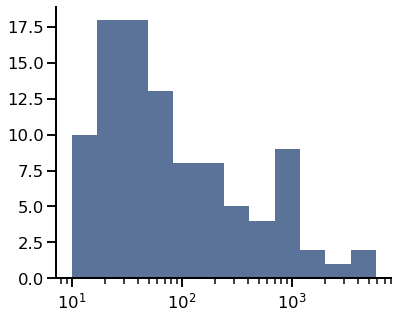

In [12]:
# Check the distribution of ERP papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['A'].counts))))
plot_count_hist(counts.terms['A'].counts, bins=12,
                save_fig=SAVE_FIG, file_name='erp_hist' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Association Articles

In [13]:
# Check the total number of association papers
print('The total # of association papers is: \t {:.0f}'.format(sum(counts.terms['B'].counts)))

The total # of association papers is: 	 8609245


Test for normality (log-spaced) 	 t-val: 5.04 	 p-val 0.08


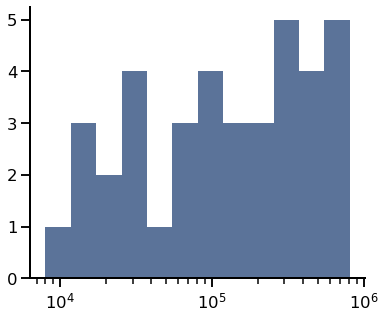

In [14]:
# Check the distribution of association papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['B'].counts))))
plot_count_hist(counts.terms['B'].counts, bins=12,
                save_fig=SAVE_FIG, file_name=name + '_assoc_hist' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Co-occurence Numbers

In [15]:
# Check how many co-occurence values are zero
n_coocs = np.multiply(*counts.counts.shape)
n_zero = sum(np.ravel(counts.counts) == 0)
percent_zero = (n_zero / n_coocs) * 100

In [16]:
# Print out completeness of the co-occurence matrix
print('Percent zero: \t\t% {:4.2f}'.format(percent_zero))
print('Percent non-zero: \t% {:4.2f}'.format(100 - percent_zero))

Percent zero: 		% 32.87
Percent non-zero: 	% 67.13


In [17]:
# Print out summaries of the co-occurence data
print('The total number of cooc values is: \t{:d}'.format(sum(np.ravel(counts.counts))))
print('The median number of cooc values is: \t{:2.2f}'.format(np.median(np.ravel(counts.counts))))

The total number of cooc values is: 	80084
The median number of cooc values is: 	2.00


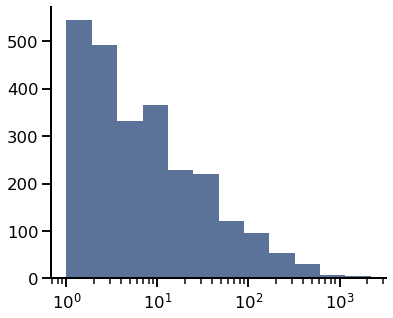

In [18]:
# Plot the distribution of (non-zero) co-occurence values
plot_count_hist(np.ravel(counts.counts), bins=12, log=True)

# Check Counts

In [19]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'P300'  with  5839  articles.
The most studied term is  'intelligence'  with  809677  articles.


In [20]:
# Check how many papers were found for each ERP term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'P100'    -   1734
  'P110'    -     26
  'P120'    -     61
  'P150'    -    157
  'P160'    -     29
  'P170'    -     32
  'P180'    -     75
  'P190'    -     26
  'P200'    -    834
  'P220'    -     37
  'P230'    -     18
  'P240'    -     27
  'P250'    -     86
  'P260'    -     37
  'P270'    -     14
  'P300'    -   5839
  'P3a'     -    979
  'P3b'     -   1061
  'P340'    -     10
  'P350'    -     68
  'P400'    -    167
  'P500'    -     51
  'P550'    -     15
  'P600'    -    716
  'P900'    -     21
  'N100'    -   1007
  'N110'    -     21
  'N120'    -     51
  'N130'    -     34
  'N135'    -     45
  'N140'    -    177
  'N150'    -    117
  'N160'    -     55
  'N170'    -   1381
  'N180'    -     39
  'N190'    -     24
  'N200'    -    780
  'N2a'     -     95
  'N2b'     -    236
  'N2c'     -     25
  'N2pc'    -    507
  'N220'    -     10
  'N230'    -     11
  'N240'    -     20
  'N250'    -    269


In [21]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'anticipation'         -   380173
  'attention'            -   459859
  'arousal'              -    29736
  'auditory'             -   106852
  'categorization'       -    17140
  'cognitive control'    -     8004
  'comprehension'        -    26315
  'conflict'             -    56000
  'conscious'            -   242314
  'decision making'      -   154583
  'emotion'              -   261878
  'error'                -   213914
  'executive function'   -    24810
  'face'                 -   319622
  'fear'                 -    70819
  'intelligence'         -   809677
  'language'             -   162899
  'learning'             -   350320
  'memory'               -   269911
  'motor'                -   719284
  'music'                -    21493
  'pain'                 -   674236
  'perception'           -   187195
  'phonology'            -    15963
  'prediction'           -   580793
  'reading'              -   130189
  'recogn

In [22]:
# Check the most commonly associated association term for each ERP
counts.check_data()

For  'P100'   the highest association is  'vision'              with        1224
For  'P110'   the highest association is  'vision'              with          12
For  'P120'   the highest association is  'vision'              with          19
For  'P150'   the highest association is  'vision'              with          36
For  'P160'   the highest association is  'attention'           with           5
For  'P170'   the highest association is  'vision'              with           9
For  'P180'   the highest association is  'motor'               with          17
For  'P190'   the highest association is  'somatosensory'       with           6
For  'P200'   the highest association is  'auditory'            with         292
For  'P220'   the highest association is  'vision'              with           9
For  'P230'   the highest association is  'vision'              with           9
For  'P240'   the highest association is  'somatosensory'       with           8
For  'P250'   the highest as

In [23]:
# Check the most commonly associated ERP for each term
counts.check_data(dim='B')

For  'anticipation'        the highest association is  'CNV'    with         271
For  'attention'           the highest association is  'P300'   with        1360
For  'arousal'             the highest association is  'P300'   with         141
For  'auditory'            the highest association is  'MMN'    with        2205
For  'categorization'      the highest association is  'N170'   with          96
For  'cognitive control'   the highest association is  'ERN'    with         153
For  'comprehension'       the highest association is  'N400'   with         571
For  'conflict'            the highest association is  'ERN'    with         135
For  'conscious'           the highest association is  'P300'   with         227
For  'decision making'     the highest association is  'FRN'    with         147
For  'emotion'             the highest association is  'LPP'    with         649
For  'error'               the highest association is  'ERN'    with        1034
For  'executive function'  t

## Select ERPs with enough articles

In [24]:
# Check how many ERPs currently
counts.terms['A'].n_terms

98

In [25]:
# Drop ERPs without a target number of articles
counts.drop_data(N_ERPS, dim='A')
print(counts.terms['A'].n_terms)

31


## Group Level Plots

In [26]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

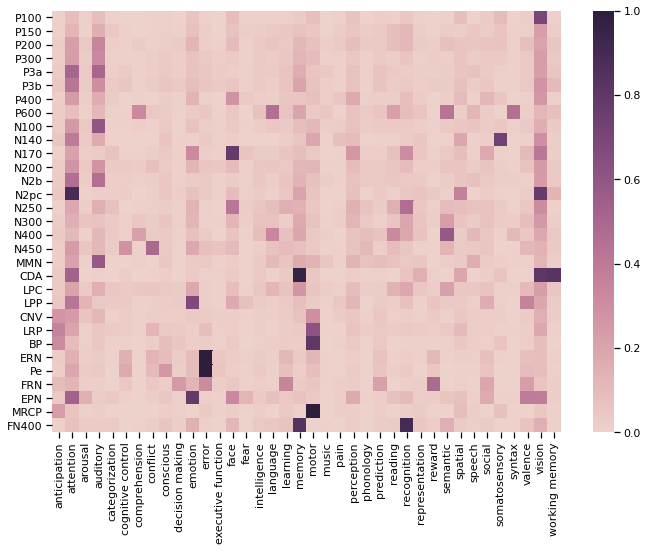

In [27]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 8),
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

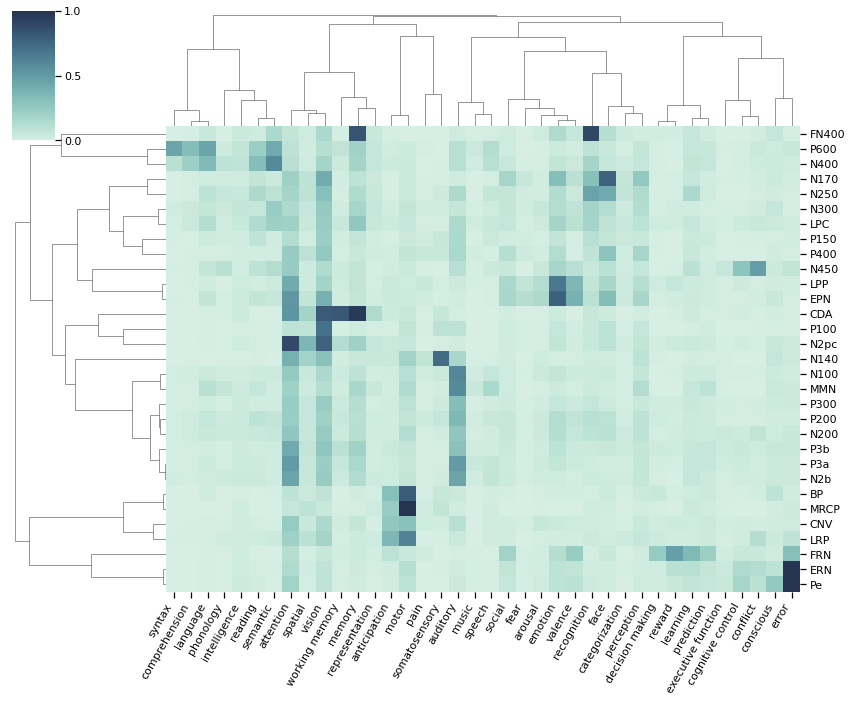

In [28]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', 
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_clustermap' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Similarity Measure

In [29]:
# Calculate similarity between all ERPs (based on term association percents)
counts.compute_score('similarity', 'A')

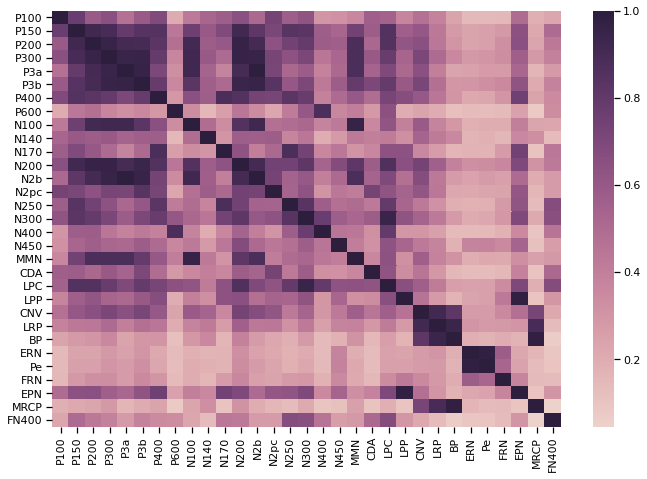

In [30]:
# Plot similarity matrix between ERPs
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name + '_similarity' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

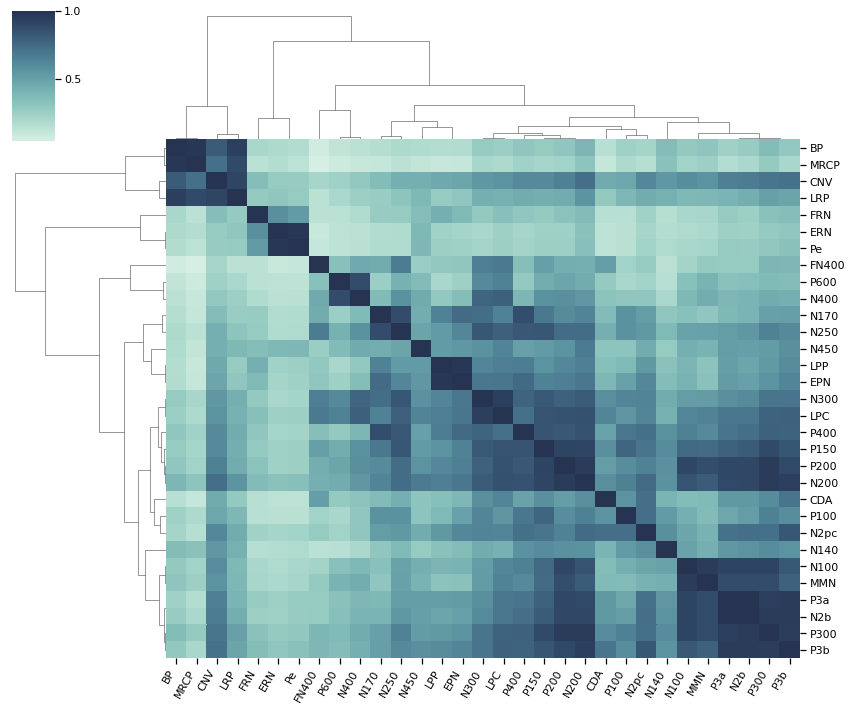

In [31]:
# Plot a clustermap, clustering ERPs based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', 
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_similarity_cluster' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Association Score

In [32]:
# Calculate association between all ERPs
counts.compute_score('association')

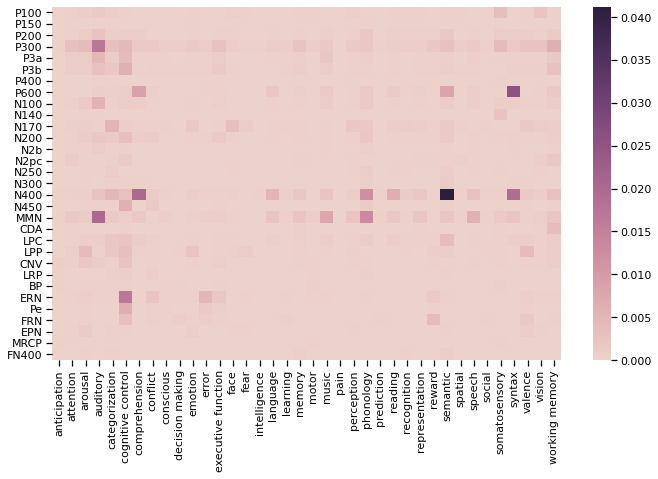

In [33]:
# Plot similarity matrix between terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

### Dendrograms

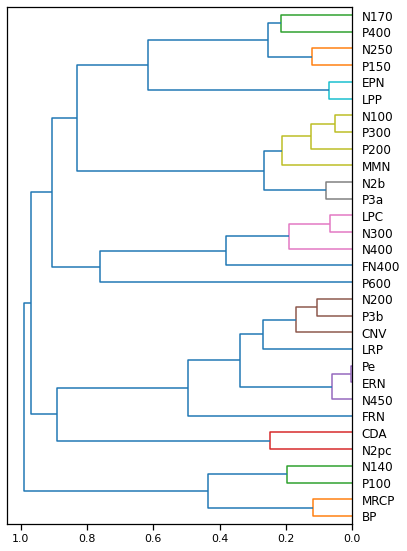

In [34]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts, attribute='score', figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name + '_erp_dendro' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

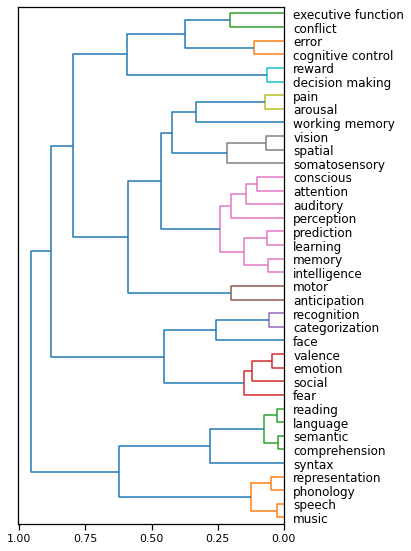

In [35]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts, attribute='score', transpose=True, figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name + '_term_dendro' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

## Component correlates across time

In [36]:
# Reload, and recompute normalized score, and drop sparse components
counts = load_object('counts_' + name, directory=db)
counts.compute_score('normalize')
counts.drop_data(250)
print('Number of kept ERPs for this analysis: {}'.format(len(counts.terms['A'].labels)))

Number of kept ERPs for this analysis: 22


In [37]:
# Load canonical latency information
labels = load_txt_file('erp_labels.txt', term_dir, split_elements=False)
latencies = load_txt_file('latencies.txt', term_dir, split_elements=False)
latency_dict = {label : latency.split(', ') for label, latency in zip(labels, latencies)}

### Check the highest association across time

In [38]:
# Get the time and polarity information for the ERPs
time_associations = get_time_associations(counts, latency_dict)

In [39]:
# Set ERPs to drop from this analysis
exclude = ['P3b', 'MMN', 'N2pc', 'MRCP', 'BP', 'LRP']

Exclusion notes:
- P3b dropped because P3a has same association (attention) at the same time
- MMN dropped because N200 has the same association (auditory) at the same time
- N2pc dropped because FRN has the same time point, and chosen as it has more papers
- MRCP, BP, LRP all dropped as preparatory activity (negative latency), all relating to motor

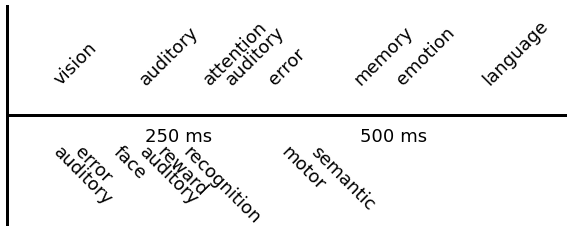

In [40]:
# Plot time associations
plot_time_associations(time_associations, exclude=exclude,
                       save_fig=SAVE_FIG, file_name=name + '_time' + SAVE_EXT, 
                       directory=figs_dir, save_kwargs={'transparent' : True})

### Check average association value across time

Here, we check for a relationship between association strength and latency, in particular analyzing the correlation between average association strength of a component, and it's typical latency.

Note that there are some settings for this analysis, including:
- a threshold for the number of articles needed to be included in the analysis
- whether to drop components with a negative latency (occur before the stimulus)
- the type of averaging to do across associations (mean or median)

In explorations of this analysis, we find that this analysis robust to changes in this settings (is not dependent on the exact settings used here). 

In [41]:
# Settings for current analysis
drop_number = 50
drop_negatives = False
avg_func = np.median

In [42]:
# Reload the counts object
counts = load_object('counts_' + name, directory=db)
counts.compute_score('normalize')
counts.drop_data(drop_number)
print('Number of kept ERPs for this analysis: {}'.format(len(counts.terms['A'].labels)))

Number of kept ERPs for this analysis: 52


In [43]:
# Grab the association matrix values, sort, and extract latencies
all_time_associations = get_time_associations(counts, latency_dict, 'all')
sorted_associations = sorted(all_time_associations, key=lambda x: x['latency'])
if drop_negatives:
    sorted_associations = [el for el in sorted_associations if el['latency'] > 0]
latencies = [el['latency'] for el in sorted_associations]

In [44]:
# Compute the average association value per component across time
avgs = [avg_func(val['association']) for val in sorted_associations]

In [45]:
# Check the correlation between latency and average association score
print('Corr: {:2.4f}, \t p-val: {:2.4f}'.format(*spearmanr(latencies, avgs)))

Corr: 0.3855, 	 p-val: 0.0048


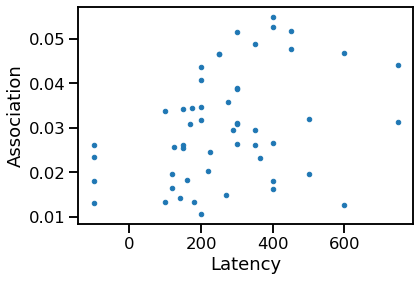

In [46]:
# Plot the comparison between latency and average association score 
plot_latency_values(latencies, avgs,
                    save_fig=SAVE_FIG, file_name=name + '_latency_corr' + SAVE_EXT, 
                    directory=figs_dir, save_kwargs={'transparent' : True})

#### Control Analyses

Here, we add some control analyses for the association analysis above. 

For example, we can analyze the variance of the set of associations per term, to examine whether it could be an increasing number of outliers (that would increase the variance) that may explain the finding.

In [47]:
# Compute the variance of the association scores per component
variances = [np.var(ass['association']) for ass in sorted_associations]

In [48]:
# Check the correlation between the variance of the associations and latency
print('Corr: {:2.4f}, \t p-val: {:2.4f}'.format(*spearmanr(latencies, variances)))

Corr: -0.0195, 	 p-val: 0.8911


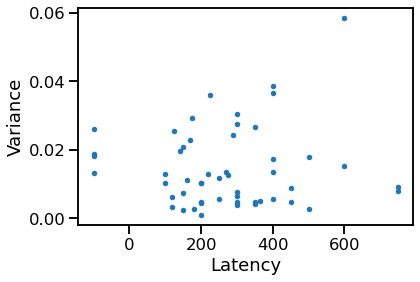

In [49]:
# Plot the comparison of variance of the associations to latency
plot_latency_values(latencies, variances, ylabel='Variance')

Next, we will analyze a threshold analysis, calculating the number of associations that cross a threshold value, and examining how this relates to latency. This will help us to explore if it's, for example, a small number very associations that increases with latency, and/or a general trend to an increase in associations of moderate magnitude.

In [50]:
# Compute the number of values that pass an association threshold
low_thresh, high_thresh = 0.1, 0.3
low_thresh_counts = [np.sum(ass['association'] > low_thresh) for ass in sorted_associations]
high_thresh_counts = [np.sum(ass['association'] > high_thresh) for ass in sorted_associations]

In [51]:
# Check the correlations between threshold crossing counts and latency
print('Low Thresh  -  Corr: {:2.4f} \t p-val: {:2.4f}'.format(\
    *spearmanr(latencies, low_thresh_counts)))
print('High Thresh -  Corr: {:2.4f} \t p-val: {:2.4f}'.format(\
    *spearmanr(latencies, high_thresh_counts)))

Low Thresh  -  Corr: 0.4388 	 p-val: 0.0011
High Thresh -  Corr: 0.1136 	 p-val: 0.4227


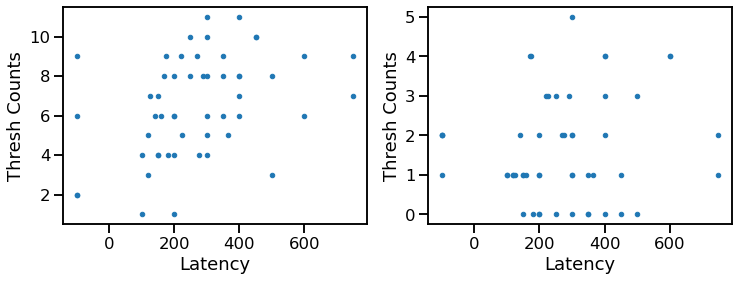

In [52]:
# Plot the comparison between threshold crossing counts and latency
_, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_latency_values(latencies, low_thresh_counts, ylabel='Thresh Counts', ax=axes[0])
plot_latency_values(latencies, high_thresh_counts, ylabel='Thresh Counts', ax=axes[1])

Based on the above control analyses, the comparisons between latency and association strength appear to be generally robust, and not driven by outliers (a small number of associations with high values). 